In [12]:
import pandas as pd
data=pd.read_excel('/home/lz/work/pulsar_kick_velocity/Pulsar_PA15_new_parallax.xlsx')
name = list(data.iloc[:,0]) 
parallax = list(data.iloc[:,1]) 
p_err_up = list(data.iloc[:,2]) 
p_err_low = list(data.iloc[:,3]) 
alpha = list(data.iloc[:,4]) 
alpha_err=list(data.iloc[:,5]) 
beta=list(data.iloc[:,6]) 
beta_err=list(data.iloc[:,7]) 
zeta=list(data.iloc[:,8])

In [13]:
print(data)

        Jname  Parallax(mas)  P_err_up  P_err_low  Alpha  Alpha_err   Beta  \
0  J0139+5814           0.37      0.04       0.04 -19.11       0.07 -16.60   
1  J0534+2200           0.53      0.06       0.06 -11.34       0.06   2.65   
2  J0835-4510           3.50      0.20       0.20 -49.68       0.06  29.90   
3  J1932+1059           2.77      0.07       0.07  94.09       0.11  42.99   
4  J2157+4017           0.28      0.06       0.06  16.13       0.10   4.12   

   Beta_err   zeta  
0      0.07   73.1  
1      0.14   61.3  
2      0.10   63.6  
3      0.16   68.0  
4      0.12  104.4  


In [14]:
#将视差转化为距离kpc，并将list 转化为numpy
import numpy as np
distance = [1 / p for p in parallax]  # 对每个视差值计算距离
distance=np.array(distance)
parallax=np.array(parallax)
alpha = np.array(alpha)  # 将 alpha 转换为数组
beta = np.array(beta) 
zeta=np.array(zeta)
#Pulsar_PA15_new数组的2D速度
V_trans= 4.74*distance*np.sqrt(alpha**2+beta**2) #km/s
#zeta是自转-视线夹角
sin_zeta = np.sin(np.deg2rad(180-zeta))
sqrt_alpha_beta=np.sqrt(alpha**2+beta**2)
V_3D=V_trans/sin_zeta
print(V_trans)
print(V_3D)
print(zeta)
print(name)

[324.28109939 104.15048577  78.52653084 177.01584337 281.82451634]
[338.91774197 118.73789122  87.66942037 190.91773708 290.96574011]
[ 73.1  61.3  63.6  68.  104.4]
['J0139+5814', 'J0534+2200', 'J0835-4510', 'J1932+1059', 'J2157+4017']


### Calculate  transmission error of 3D velocity

In [15]:
dV_dp = - (4.74 * sqrt_alpha_beta) / (parallax**2 * sin_zeta) #V 对parallax的偏导数
dV_dalpha = (4.74 * alpha) / (parallax * sqrt_alpha_beta * sin_zeta) # V对 \alpha的偏导数
dV_dbeta = (4.74 * beta) / (parallax * sqrt_alpha_beta * sin_zeta)  # V对 \beta的偏导数

# 计算上限误差
sigma_V_pos = np.sqrt(
    (dV_dp * p_err_low)**2 +
    (dV_dalpha * alpha_err)**2 +
    (dV_dbeta * beta_err)**2
)

# 计算下限误差
sigma_V_neg = np.sqrt(
    (dV_dp * p_err_up)**2 +
    (dV_dalpha * alpha_err)**2 +
    (dV_dbeta * beta_err)**2
)

print("V =", V_3D, "km/s")
print("sigma_V_pos=",sigma_V_pos, "km/s")
print("sigma_V_neg=",sigma_V_neg, "km/s")

V = [338.91774197 118.73789122  87.66942037 190.91773708 290.96574011] km/s
sigma_V_pos= [36.65174097 13.45913924  5.01089069  4.82972755 62.37495288] km/s
sigma_V_neg= [36.65174097 13.45913924  5.01089069  4.82972755 62.37495288] km/s


### Read another data

In [17]:
data1=pd.read_excel('/home/lz/work/pulsar_kick_velocity/Pulsar_PA15_new.xlsx')
name1 = list(data1.iloc[:,0]) 
distance1=list(data1.iloc[:,1])
alpha1=list(data1.iloc[:,2])
alpha1_err=list(data1.iloc[:,3])
beta1=list(data1.iloc[:,4])
beta1_err=list(data1.iloc[:,5])
zeta1=list(data1.iloc[:,6])
zeta1_err=list(data1.iloc[:,7])

In [18]:
print(data1)

        Jname  Distance(kpc)  Alpha  Alpha_err  Beta  Beta_err   zeta  \
0  J0908-1739          0.805     27      11.00   -40     11.00   80.4   
1  J1328-4357          1.424      3       7.00    54      2.30   32.6   
2  J1913-0440          4.041      7      13.00    -5      9.00   35.2   
3  J2257+5909          3.000     18       4.53    -2      4.52  125.9   
4  J1709-4429          2.600     13       2.00    -1      2.00   55.0   

   zeta_err  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.2  


In [19]:
distance1=np.array(distance1)
distance1_err=0.2*distance1
alpha1=np.array(alpha1)
beta1=np.array(beta1)
zeta1=np.array(zeta1)
sqrt_alpha_beta1=np.sqrt(alpha1**2+beta1**2)
V_trans1= 4.74* distance1 * np.sqrt(alpha1**2+beta1**2) #km/s
sin_zeta1 = np.sin(np.deg2rad(180-zeta1))
sin_zeta1=np.abs(sin_zeta1)
V1_3D=V_trans1/sin_zeta1
print(V1_3D)
print(name1)

[186.7599706  677.55917139 285.84771938 317.92828969 196.16053211]
['J0908-1739', 'J1328-4357', 'J1913-0440', 'J2257+5909', 'J1709-4429']


In [20]:
cos_zeta1=np.cos(np.deg2rad(180-zeta1))
cos_zeta1=np.abs(cos_zeta1)

In [21]:
dV_dD1 = (4.74 * sqrt_alpha_beta1) / sin_zeta1
dV_dalpha1 = (4.74 * distance1 * alpha1) / (sqrt_alpha_beta1 * sin_zeta1)
dV_dbeta1 = (4.74 * distance1 * beta1) / (sqrt_alpha_beta1 * sin_zeta1)
dV_dzeta1 = -V_trans1/(sin_zeta1) * (cos_zeta1/sin_zeta1)  # 注意负号

sigma_V_distance=dV_dD1 * distance1
sigma_V_alpha = dV_dalpha1 * alpha1_err
sigma_V_beta = dV_dbeta1 * beta1_err
sigma_V_zeta = dV_dzeta1 * zeta1_err

# 计算总误差
sigma_V = np.sqrt(
    sigma_V_distance**2 +
    sigma_V_alpha**2 +
    sigma_V_beta**2 +
    sigma_V_zeta**2
)

print("V =", V1_3D, "km/s ±", sigma_V, "km/s")

V = [186.7599706  677.55917139 285.84771938 317.92828969 196.16053211] km/s ± [191.54997287 678.18715635 485.27065685 327.72228759 200.34713948] km/s


In [22]:
V_3D_new=np.concatenate((V_3D, V1_3D))
V_3D_err_pos=np.concatenate((sigma_V_pos,sigma_V))
V_3D_err_neg=np.concatenate((sigma_V_neg, sigma_V))
V_3D_err_pos=np.append(V_3D_err_pos,75)
V_3D_err_neg=np.append(V_3D_err_neg,57)
V_3D_new=np.append(V_3D_new, 407.0)
print(V_3D_new)
print(V_3D_err_pos)
print(V_3D_err_neg)

[338.91774197 118.73789122  87.66942037 190.91773708 290.96574011
 186.7599706  677.55917139 285.84771938 317.92828969 196.16053211
 407.        ]
[ 36.65174097  13.45913924   5.01089069   4.82972755  62.37495288
 191.54997287 678.18715635 485.27065685 327.72228759 200.34713948
  75.        ]
[ 36.65174097  13.45913924   5.01089069   4.82972755  62.37495288
 191.54997287 678.18715635 485.27065685 327.72228759 200.34713948
  57.        ]


开始处理 11 个源的速度采样...
源 1: Center=338.9 (+36.7/-36.7) -> Sampled Mean=339.4
源 2: Center=118.7 (+13.5/-13.5) -> Sampled Mean=119.2
源 3: Center=87.7 (+5.0/-5.0) -> Sampled Mean=87.8
源 4: Center=190.9 (+4.8/-4.8) -> Sampled Mean=191.1
源 5: Center=291.0 (+62.4/-62.4) -> Sampled Mean=289.4
源 6: Center=186.8 (+191.5/-191.5) -> Sampled Mean=247.3
源 7: Center=677.6 (+678.2/-678.2) -> Sampled Mean=887.1
源 8: Center=285.8 (+485.3/-485.3) -> Sampled Mean=502.1
源 9: Center=317.9 (+327.7/-327.7) -> Sampled Mean=414.2
源 10: Center=196.2 (+200.3/-200.3) -> Sampled Mean=258.1
源 11: Center=407.0 (+75.0/-57.0) -> Sampled Mean=416.0

处理完成！
最终数组形状: (11000,)
是否包含负值: False
11000


(array([1.760e+02, 2.180e+02, 1.223e+03, 9.850e+02, 4.850e+02, 8.300e+02,
        7.980e+02, 4.070e+02, 5.140e+02, 6.820e+02, 8.330e+02, 7.190e+02,
        5.540e+02, 3.550e+02, 3.020e+02, 2.280e+02, 1.880e+02, 1.350e+02,
        9.900e+01, 8.600e+01, 9.300e+01, 8.700e+01, 6.800e+01, 7.100e+01,
        5.700e+01, 6.000e+01, 4.700e+01, 5.200e+01, 3.700e+01, 4.900e+01,
        4.800e+01, 4.100e+01, 3.300e+01, 4.100e+01, 2.800e+01, 2.200e+01,
        3.300e+01, 1.900e+01, 2.000e+01, 1.400e+01, 1.500e+01, 1.700e+01,
        1.500e+01, 1.400e+01, 1.800e+01, 1.400e+01, 1.500e+01, 1.800e+01,
        1.200e+01, 5.000e+00, 5.000e+00, 1.400e+01, 7.000e+00, 8.000e+00,
        1.200e+01, 8.000e+00, 3.000e+00, 8.000e+00, 2.000e+00, 5.000e+00,
        3.000e+00, 5.000e+00, 3.000e+00, 8.000e+00, 3.000e+00, 5.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+0

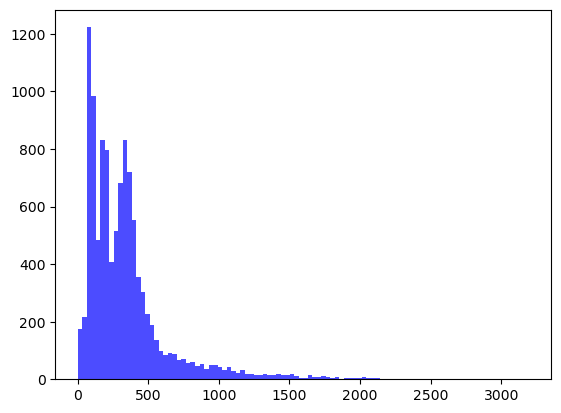

In [24]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
# ==========================================
# 1. 定义拒绝采样函数 (和之前处理 Dist 的逻辑一模一样)
# ==========================================
def sample_source(center, err_plus, err_minus, n_needed=1000, batch_size=5000):
    valid_samples = np.array([])
    # 循环直到凑够 n_needed (1000) 个
    while len(valid_samples) < n_needed:
        # 1. 每次生成一大批 (5000个)
        # 上半部分 (50%)
        upper = truncnorm.rvs(0, np.inf, loc=center, scale=err_plus, size=batch_size // 2)
        # 下半部分 (50%)
        lower = truncnorm.rvs(-np.inf, 0, loc=center, scale=err_minus, size=batch_size - (batch_size // 2))
        # 拼接
        batch = np.concatenate((upper, lower))
        # 2. 【核心】拒绝负值 (只保留 > 0)
        # 速度必须是正的，物理上没有负速率
        good_batch = batch[batch > 0]
        # 3. 加入池子
        valid_samples = np.concatenate((valid_samples, good_batch))
    
    # 4. 打乱并截取前 1000 个
    np.random.shuffle(valid_samples)
    return valid_samples[:n_needed]

print(f"开始处理 {len(V_3D_new)} 个源的速度采样...")

all_v3d_samples = []
# 遍历每个源
for i in range(len(V_3D_new)):
    # 提取当前源的参数
    v_cen = V_3D_new[i]
    v_upp = V_3D_err_pos[i]
    v_low = V_3D_err_neg[i]
    
    # 执行采样
    # 这里会自动处理负值拒绝，并保证返回严格的 1000 个
    samples = sample_source(v_cen, v_upp, v_low, n_needed=1000)
    # 存入列表
    all_v3d_samples.extend(samples)
    
    # 打印进度 (可选)
    print(f"源 {i+1}: Center={v_cen:.1f} (+{v_upp:.1f}/-{v_low:.1f}) -> Sampled Mean={np.mean(samples):.1f}")
final_v3d_flat = np.array(all_v3d_samples)

print("\n处理完成！")
print(f"最终数组形状: {final_v3d_flat.shape}") # 应该是 (12000,)
print(f"是否包含负值: {np.any(final_v3d_flat < 0)}") # 应该是 False

# 如果需要保存
np.savetxt("v3d_mc_samples.txt", final_v3d_flat)
print(len(final_v3d_flat))
plt.hist(final_v3d_flat, bins=100, alpha=0.7, color='blue')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014, vcirc
from galpy.util import conversion
import astropy.units as u

# ==========================================
# 1. 物理环境配置与辅助函数
# ==========================================
RO_KPC = 8.12
VO_KMS = 220.0
POT = MWPotential2014
N_SAMPLES = 1000  # 我们最终需要的有效样本数

def sample_dist(center, err_plus, err_minus, n_needed, oversample=3):
    """
    【核心修改】拒绝采样函数
    逻辑：为了得到 n_needed 个正值，先生成 n * oversample 个，
    扔掉负的，如果还不够就继续补，直到凑齐。
    """
    valid_samples = np.array([])
    
    # 循环直到凑齐 n_needed 个样本
    while len(valid_samples) < n_needed:
        # 1. 估算还需要生成多少个 (为了保险，多生成一些)
        n_batch = (n_needed - len(valid_samples)) * oversample
        # 至少生成 100 个，避免最后只差 1 个时效率太低
        n_batch = max(n_batch, 100)
        
        # 2. 生成这一批次的原始数据 (使用之前的双片正态逻辑)
        # 上半部分
        upper = truncnorm.rvs(0, np.inf, loc=center, scale=err_plus, size=n_batch // 2)
        # 下半部分
        lower = truncnorm.rvs(-np.inf, 0, loc=center, scale=err_minus, size=n_batch - (n_batch // 2))
        batch = np.concatenate((upper, lower))
        
        # 3. 【关键步骤】拒绝负值 (只保留 > 0 的)
        # 这里不需要设 0.01，直接要大于 0 的物理值即可
        # 如果你想更保守，也可以设 > 0.001
        good_batch = batch[batch > 0]
        
        # 4. 加入到有效池中
        valid_samples = np.concatenate((valid_samples, good_batch))
    
    # 5. 截取前 n_needed 个并打乱
    result = valid_samples[:n_needed]
    np.random.shuffle(result)
    return result

def get_kick_velocity_at_birth(orbit_obj, age_myr):
    """ 计算出生时刻的 Kick 速度 """
    time_unit_gyr = conversion.time_in_Gyr(ro=RO_KPC, vo=VO_KMS)
    ts_galpy = np.array([0, -(age_myr / 1000.0) / time_unit_gyr])
    
    # 使用 dop853
    orbit_obj.integrate(ts_galpy, POT, method='dop853')
    
    x = orbit_obj.x(ts_galpy[-1], use_physical=True)
    y = orbit_obj.y(ts_galpy[-1], use_physical=True)
    vx = orbit_obj.vx(ts_galpy[-1], use_physical=True)
    vy = orbit_obj.vy(ts_galpy[-1], use_physical=True)
    vz = orbit_obj.vz(ts_galpy[-1], use_physical=True)
    
    R_cyl = np.sqrt(x**2 + y**2)
    vc_local = vcirc(POT, R_cyl/RO_KPC) * VO_KMS
    v_lsr_x = -vc_local * (y / R_cyl)
    v_lsr_y =  vc_local * (x / R_cyl)
    
    vk_x = vx - v_lsr_x
    vk_y = vy - v_lsr_y
    vk_z = vz 
    return np.sqrt(vk_x**2 + vk_y**2 + vk_z**2)

# ==========================================
# 2. 数据读取与处理
# ==========================================
try:
    df = pd.read_excel('/home/lz/galpy2.xlsx')
    df.fillna(0, inplace=True)
except Exception as e:
    print(f"无法读取文件: {e}")
    df = pd.DataFrame()

print(f"开始 MC 分析 (拒绝采样模式)，共 {len(df)} 颗源...")
print(f"目标：每颗源生成 {N_SAMPLES} 个物理上合法的样本 (Dist > 0)\n")

flat_data_for_bayes = [] 

for i, row in df.iterrows():
    try:
        name = row['Name']
        ra, dec = row['RA'], row['DEC']
        
        # 距离参数
        dist_cen = row['Dist']
        dist_upp = row['Dist_upp'] 
        dist_low = row['Dist_low'] 
        
        # 自行参数
        pmra_cen = row['pmra']
        if 'pmra_err' in row: pmra_err = row['pmra_err']
        elif 'pm_err' in row: pmra_err = row['pm_err']
        else: raise KeyError("找不到 pmra_err")

        pmdec_cen = row['pmdec']
        if 'pmdec_err' in row: pmdec_err = row['pmdec_err']
        elif 'pmdec_error' in row: pmdec_err = row['pmdec_error']
        else: raise KeyError("找不到 pmdec_err")
        
        zeta = row['zeta']
        raw_age = row['age']
        psr_age_myr = raw_age / 1e6 if raw_age > 1000 else raw_age
        
        # --- 1. 使用拒绝采样获取距离 ---
        # 这会自动处理掉所有负值，保证 sim_dist 长度正好是 1000
        sim_dist = sample_dist(dist_cen, dist_upp, dist_low, N_SAMPLES)
        
        # --- 2. 采样自行 (对称误差，不需要拒绝，除非你觉得自行太大也不合理) ---
        sim_pmra = np.random.normal(pmra_cen, pmra_err, N_SAMPLES)
        sim_pmdec = np.random.normal(pmdec_cen, pmdec_err, N_SAMPLES)
        
        # --- 3. 速度推导 ---
        sim_vt = 4.74047 * sim_dist * np.sqrt(sim_pmra**2 + sim_pmdec**2)
        
        tan_zeta = np.tan(np.radians(zeta))
        if abs(tan_zeta) < 1e-4:
            sim_vr = np.zeros(N_SAMPLES)
        else:
            sim_vr = sim_vt / tan_zeta
            
        # --- 4. 建立轨道并回溯 ---
        o_mc = Orbit(
            [ra * np.ones(N_SAMPLES), 
             dec * np.ones(N_SAMPLES), 
             sim_dist, 
             sim_pmra, 
             sim_pmdec, 
             sim_vr],
            radec=True, ro=RO_KPC, vo=VO_KMS
        )
        
        # 回溯
        birth_kicks = get_kick_velocity_at_birth(o_mc, psr_age_myr)
        
        # --- 5. 数据清洗 ---
        # 虽然距离已经是正的了，但为了防范 galpy 计算异常（如极高速度），还是保留这步过滤
        valid_indices = np.isfinite(birth_kicks)
        clean_kicks = birth_kicks[valid_indices]
        clean_kicks = clean_kicks[clean_kicks < 5000] 
        
        flat_data_for_bayes.extend(clean_kicks)
        
        print(f"[{i+1}/{len(df)}] {name:<12} Age={psr_age_myr:>5.1f} | Kick: {np.mean(clean_kicks):.0f} ± {np.std(clean_kicks):.0f} km/s (样本数: {len(clean_kicks)})")

    except Exception as e:
        print(f"❌ 处理 {row.get('Name', 'Unknown')} 时出错: {e}")

# ==========================================
# 3. 结果输出
# ==========================================
final_data = np.array(flat_data_for_bayes)

if len(final_data) > 0:
    print("\n分析完成！")
    print(f"生成的有效数据点总数: {len(final_data)}")
    np.savetxt("mc_birth_kicks_for_bayes.txt", final_data)
    print("数据已保存至 'birth_kick_7_aligment.txt'")
    plt.figure(figsize=(10, 6))
    plt.hist(final_data, bins=100, color='royalblue', alpha=0.7, density=True, label='Reconstructed Natal Kicks')
    plt.xlabel('Velocity (km/s)', fontsize=14)
    plt.title(f'Natal Kick Distribution', fontsize=16)
    plt.legend()
    plt.show()

In [28]:
backtracking_7=np.loadtxt('/home/lz/work/mc_birth_kicks_for_bayes.txt')
samples_11=np.loadtxt('/home/lz/work/pulsar_kick_velocity/v3d_mc_samples.txt')
print(len(backtracking_7))
print(len(samples_11))


7000
11000


### 18000 Aligment samples 

In [32]:
V_3D_18_20_aligment=np.concatenate((backtracking_7, samples_11))
np.savetxt('/home/lz/work/pulsar_kick_velocity/V_3D_18_20err_aligment.txt', V_3D_18_20_aligment, fmt='%.6f')